In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #data visualization library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix  # evaluation metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [52]:
# Import data
df = pd.read_csv('dementia_dataset.csv')

# Remove columns not used in model
df.drop(columns = ['Subject ID', 'MRI ID', 'Hand', 'MR Delay'],inplace=True)


# Cleaning and modifying data
df_one = pd.get_dummies(df["Group"])
df_two = pd.concat((df_one, df), axis=1).drop(["Group", "Nondemented", "Converted"], axis=1)
df_three = pd.get_dummies(df_two["M/F"])
df_four = pd.concat((df_three, df_two), axis=1)
df_four = df_four.drop(['F', 'M/F'], axis=1)
data = df_four.rename(columns={"M": "Gender"})
data = data[['Gender', 'Visit', 'Age', 'EDUC', 'SES',
       'MMSE', 'eTIV', 'nWBV', 'ASF', 'Demented']]

# Replacing a few missing values with dataset mean
data['SES'] = data['SES'].fillna(np.mean(data['SES']))
data['MMSE'] = data['MMSE'].fillna(np.mean(data['MMSE']))

# Display first 5 data points
data.head()

,Gender,Visit,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,Demented
0,1,1,87,14,2.000000,27.0,1987,0.696,0.883,0
1,1,2,88,14,2.000000,30.0,2004,0.681,0.876,0
2,1,1,75,12,2.460452,23.0,1678,0.736,1.046,1
3,1,2,76,12,2.460452,28.0,1738,0.713,1.010,1
4,1,3,80,12,2.460452,22.0,1698,0.701,1.034,1


In [64]:
# Initialize LogisticRegression for model and StandardScaler for scaling data
lr = LogisticRegression()
scaler = StandardScaler()

# Features
X = data.iloc[:,:9].to_numpy()

# Label
y = data.iloc[:,-1].to_numpy().reshape(-1)

Training accuracy: 0.8433734939759037
Validation accuracy: 0.8548387096774194
Coefficients: [[ 0.83208617 -0.51097476 -0.7960793  -0.38045125  0.10865931 -2.66014704
  -0.039383   -0.80090716  0.39262039]]


[Text(0, 0.5, 'non-demented'), Text(0, 1.5, 'demented')]

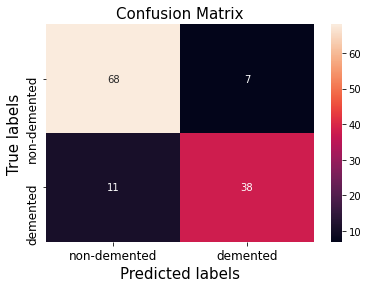

In [65]:
# Training the model with a single split

# Scale data with StandardScaler and fit logistic regression

lr.fit(scaler.fit_transform(X_train), y_train)
y_pred_train = lr.predict(scaler.fit_transform(X_train))
y_pred_val = lr.predict(scaler.fit_transform(X_val))
training_acc = accuracy_score(y_train, y_pred_train)
val_acc = accuracy_score(y_val, y_pred_val)
print(f"Training accuracy: {training_acc}")
print(f"Validation accuracy: {val_acc}")
print(f"Coefficients: {lr.coef_}")

conf_mat = confusion_matrix(y_val, y_pred_val) # NOTE: please pay attention to the order of arguments, the order matters.
precision_recall_fscore_support(y_val, y_pred_val, average=None)

ax = plt.subplot()

sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
ax.set_title('Confusion Matrix',fontsize=15)
ax.xaxis.set_ticklabels(['non-demented', 'demented'],fontsize=12)
ax.yaxis.set_ticklabels(['non-demented', 'demented'],fontsize=12)

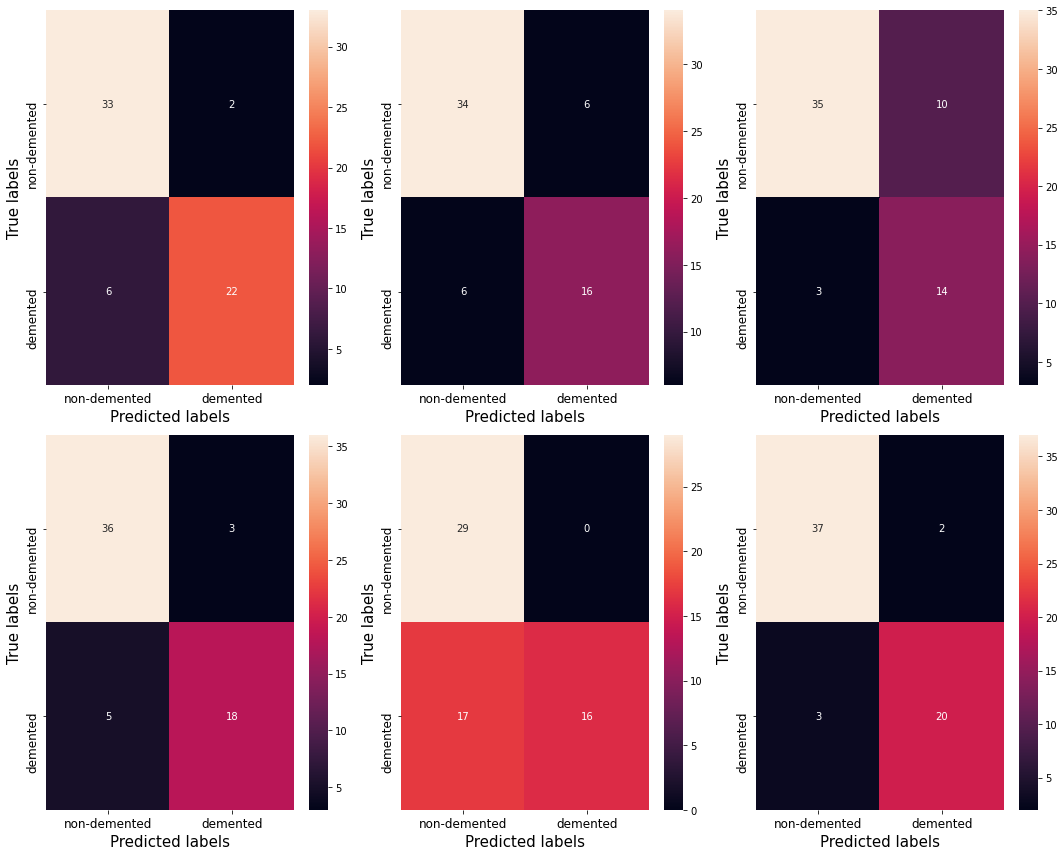

In [69]:
# Training the model with kfold cross validation with k=6

cv = KFold(n_splits=6, shuffle=True, random_state=42)

training_accuracy = [] # store the training errors
validation_accuracy = [] # store the validation errors
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

# Iterate through the indices of train and validation (iteration through each split)
for i, (train_index, val_index) in enumerate(cv.split(y)):
    
    ax = plt.subplot(2,3,i+1)

    X_train_cv, X_val_cv = X[train_index], X[val_index]
    y_train_cv, y_val_cv = y[train_index], y[val_index]
    
    lr.fit(scaler.fit_transform(X_train_cv), y_train_cv)
    y_pred_train_cv = lr.predict(scaler.fit_transform(X_train_cv))
    y_pred_val_cv = lr.predict(scaler.fit_transform(X_val_cv))
    acc_train_cv = accuracy_score(y_train_cv, y_pred_train_cv)
    acc_val_cv = accuracy_score(y_val_cv, y_pred_val_cv)
    
    
    conf_mat = confusion_matrix(y_val_cv, y_pred_val_cv) 


    sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax)
    ax.set_xlabel('Predicted labels',fontsize=15)
    ax.set_ylabel('True labels',fontsize=15)
    ax.xaxis.set_ticklabels(['non-demented', 'demented'],fontsize=12)
    ax.yaxis.set_ticklabels(['non-demented', 'demented'],fontsize=12)    
              
    training_accuracy.append(acc_train_cv)
    validation_accuracy.append(acc_val_cv)
    
plt.tight_layout()
